<a href="https://colab.research.google.com/github/ai7dnn/2024-1-BDA/blob/main/inclass/11w_0527_mon_A_ch10_text_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **빅데이터분석프로그래밍**
> 11주차 A반

# 파이썬 설치 확인

In [1]:
import site
site.getsitepackages()

['/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.10/dist-packages']

In [2]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

print(sys.version)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)
print(msno.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
2.0.3
1.25.2
0.13.1
0.5.2


# 코랩에서 한글 처리

In [3]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 14.6 MB/s eta 0:00:00


## 그래프 설정

In [4]:
# 그림 선명하게
%config InlineBackend.figure_format = 'retina'

In [5]:
# 그림 해상도와 크기: 해상도를 높이면 크기에 비례에 커짐
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.dpi' : '100'})             # 해상도, 기본값 72
plt.rcParams.update({'figure.figsize' : [4, 2.5]})      # 그림 크기, 기본값 [6, 4]

In [6]:
# 데이터프레임의 소수점 이하 n(2)자리 출력 설정
pd.set_option('display.precision', 2)

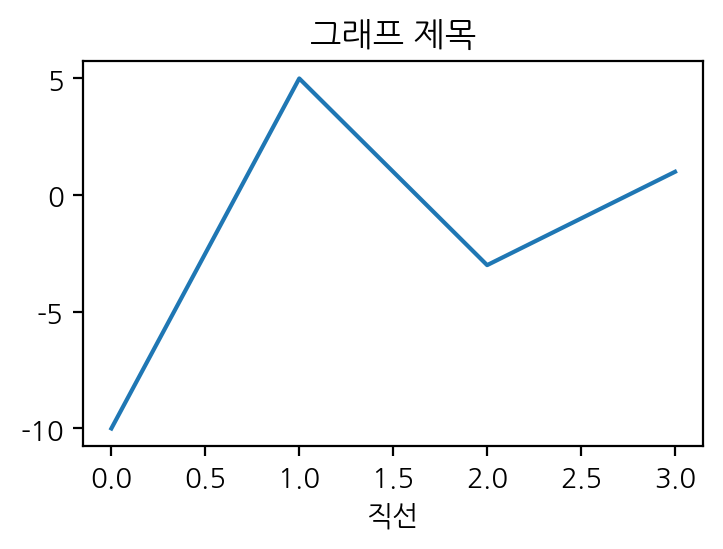

In [7]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.plot([-10, 5, -3, 1])
plt.title('그래프 제목')
plt.xlabel('직선')
plt.show()

## 수업에서 사용할 데이터를 다음 깃에서 복사
- https://github.com/ai7dnn/data.git

> #### 수업에서 파일 사용 시
> - 현재 하부 폴더: data
> - 파일: data/파일이름

In [8]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 46 (delta 7), reused 7 (delta 1), pack-reused 0
Receiving objects: 100% (46/46), 4.59 MiB | 5.86 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [9]:
import pandas as pd

exam = pd.read_csv('data/exam.csv')
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


## 한국어 텍스트 처리 준비

[KoNLPy: Python package for natural language processing (NLP) of the Korean language](https://konlpy.org/en/latest/)

In [12]:
!pip show konlpy

Name: konlpy
Version: 0.6.0
Summary: Python package for Korean natural language processing.
Home-page: http://konlpy.org
Author: Team KoNLPy
Author-email: konlpy@googlegroups.com
License: GPL v3
Location: /usr/local/lib/python3.10/dist-packages
Requires: JPype1, lxml, numpy
Required-by: 


In [11]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 30.4 MB/s eta 0:00:00


In [13]:
!pip show wordcloud

Name: wordcloud
Version: 1.9.3
Summary: A little word cloud generator
Home-page: 
Author: 
Author-email: Andreas Mueller <t3kcit+wordcloud@gmail.com>
License: MIT License
Location: /usr/local/lib/python3.10/dist-packages
Requires: matplotlib, numpy, pillow
Required-by: 


In [ ]:
# 워드 클라우드 설치
!pip install wordcloud

In [14]:
# colab 리눅스에 나눔 폰트 설치
!apt-get install fonts-nanum*

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 45 not upgraded.
Need to get 46.0 MB of archives.
After this operation, 177 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-coding all 2.5-3 [4,988 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-eco all 1.000-7 [14.7 MB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-extra all 20200506-1 [21.0

In [15]:
# 폰트 확인
!ls /usr/share/fonts/truetype/nanum/NanumGothic.ttf

/usr/share/fonts/truetype/nanum/NanumGothic.ttf


In [16]:
#  폰트 파일 이름 저장
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# **넷째마당. 다양한 데이터 분석의 세계**
---
---


# 10 텍스트 마이닝

## 10-1 대통령 연설문 텍스트 마이닝

### `KoNLPy` 패키지 설치하기

#### 1. 자바 설치하기

#### 2. `KoNLPy` 의존성 패키지 설치하기

#### 3. `KoNLPy` 설치하기

### 가장 많이 사용된 단어 알아보기

#### 1. 연설문 불러오기

In [18]:
!ls -al data/speech_moon.txt

-rw-r--r-- 1 root root 22207 May 27 05:20 data/speech_moon.txt


In [19]:
moon = open('data/speech_moon.txt', encoding = 'UTF-8').read()
moon

'정권교체 하겠습니다!\n  정치교체 하겠습니다!\n  시대교체 하겠습니다!\n  \n  ‘불비불명(不飛不鳴)’이라는 고사가 있습니다. 남쪽 언덕 나뭇가지에 앉아, 3년 동안 날지도 울지도 않는 새. 그러나 그 새는 한번 날면 하늘 끝까지 날고, 한번 울면 천지를 뒤흔듭니다.\n\n그 동안 정치와 거리를 둬 왔습니다. 그러나 암울한 시대가 저를 정치로 불러냈습니다. 더 이상 남쪽 나뭇가지에 머무를 수 없었습니다. 이제 저는 국민과 함께 높이 날고 크게 울겠습니다. 오늘 저는 제18대 대통령선거 출마를 국민 앞에 엄숙히 선언합니다.\n\n\n‘우리나라 대통령’이 되겠습니다.\n\n\n존경하는 국민 여러분!\n  \n  저는 대통령이 되겠습니다. 우리나라 대통령이 되겠습니다. 소수 특권층의 나라가 아니라 보통사람들이 주인인 ‘우리나라’, 네 편 내 편 편가르지 않고 함께 가는 우리나라, ‘우리’라는 말이 조금도 부끄럽지 않은, 진정한 ‘우리나라’의 대통령이 되겠습니다.\n\n지금까지 우리 보통사람들은 날지도 울지도 못하는 새였습니다. 나라의 주인으로 행세하지 못했고, 주인으로 대접받지 못했습니다. 나서서 말도 하지 못했습니다. 이제 몸을 일으켜 날아야 합니다. 당당하게 말하고 정치에 참여해야 합니다.\n\n제가 추구하는 ‘우리나라’는 정치인에게 맡겨놓는 나라가 아니라 시민이 직접 정치와 정책과정에 참여하는 나라입니다. 저는 시민과 동행하는 정치를 하고 싶습니다. 제가 추구하는 ‘우리나라’는 특권과 불평등의 나라가 아니라, 보통사람들이 함께 기회를 가지는 공평하고 정의로운 나라입니다.\n\n이제 권력과 돈을 가진 집단이 나라를 그들 마음대로 움직이던 시대는 끝났습니다. 힘없는 사람들에게 끝없이 희생을 강요하던 낡은 경제, 낡은 정치, 낡은 권력도 모두 끝났습니다. 오늘 저 문재인은 우리나라를 우리 모두의 나라로 선언합니다.\n\n국민이 모두 아픕니다.\n\n제가 높이 날고 크게 울겠다고 결심한 이유는 보통사람들의 삶이 너무 고달프고, 우리가 처한 현실이 너무도 엄중

#### 2. 불필요한 문자 제거하기

In [20]:
# 불필요한 문자 제거하기
import re # regular expression
moon = re.sub('[^가-힣]', ' ', moon) # 기말시험
moon

'정권교체 하겠습니다    정치교체 하겠습니다    시대교체 하겠습니다        불비불명       이라는 고사가 있습니다  남쪽 언덕 나뭇가지에 앉아   년 동안 날지도 울지도 않는 새  그러나 그 새는 한번 날면 하늘 끝까지 날고  한번 울면 천지를 뒤흔듭니다   그 동안 정치와 거리를 둬 왔습니다  그러나 암울한 시대가 저를 정치로 불러냈습니다  더 이상 남쪽 나뭇가지에 머무를 수 없었습니다  이제 저는 국민과 함께 높이 날고 크게 울겠습니다  오늘 저는 제  대 대통령선거 출마를 국민 앞에 엄숙히 선언합니다     우리나라 대통령 이 되겠습니다    존경하는 국민 여러분       저는 대통령이 되겠습니다  우리나라 대통령이 되겠습니다  소수 특권층의 나라가 아니라 보통사람들이 주인인  우리나라   네 편 내 편 편가르지 않고 함께 가는 우리나라   우리 라는 말이 조금도 부끄럽지 않은  진정한  우리나라 의 대통령이 되겠습니다   지금까지 우리 보통사람들은 날지도 울지도 못하는 새였습니다  나라의 주인으로 행세하지 못했고  주인으로 대접받지 못했습니다  나서서 말도 하지 못했습니다  이제 몸을 일으켜 날아야 합니다  당당하게 말하고 정치에 참여해야 합니다   제가 추구하는  우리나라 는 정치인에게 맡겨놓는 나라가 아니라 시민이 직접 정치와 정책과정에 참여하는 나라입니다  저는 시민과 동행하는 정치를 하고 싶습니다  제가 추구하는  우리나라 는 특권과 불평등의 나라가 아니라  보통사람들이 함께 기회를 가지는 공평하고 정의로운 나라입니다   이제 권력과 돈을 가진 집단이 나라를 그들 마음대로 움직이던 시대는 끝났습니다  힘없는 사람들에게 끝없이 희생을 강요하던 낡은 경제  낡은 정치  낡은 권력도 모두 끝났습니다  오늘 저 문재인은 우리나라를 우리 모두의 나라로 선언합니다   국민이 모두 아픕니다   제가 높이 날고 크게 울겠다고 결심한 이유는 보통사람들의 삶이 너무 고달프고  우리가 처한 현실이 너무도 엄중하기 때문입니다  근본적인 혁신  거대한 전

In [21]:
dm = open('data/speech_moon.txt', encoding = 'UTF-8').read()
dm
d = re.sub('[가-힣]', ' ', dm)
d

'          !\n            !\n            !\n  \n  ‘    (不飛不鳴)’            .               , 3                 .                         ,                .\n\n                   .                          .                          .                            .        18                           .\n\n\n‘        ’       .\n\n\n           !\n  \n               .                .                            ‘    ’,                           , ‘  ’                 ,     ‘    ’            .\n\n                                .                  ,                .                .                  .                      .\n\n        ‘    ’                                                .                        .         ‘    ’                  ,                                  .\n\n                                           .                             ,      ,                .                                 .\n\n           .\n\n                                          ,                  

In [22]:
from konlpy.tag import Hannanum
hannanum = Hannanum()
print(hannanum.nouns(u'다람쥐 헌 쳇바퀴에 타고파'))

['다람쥐', '쳇바퀴', '타고파']


#### 3. 명사 추출하기

In [ ]:
# hannanum 만들기
import konlpy
hannanum = konlpy.tag.Hannanum()

In [23]:
# 명사 추출하기, 기말시험
hannanum.nouns("대한민국의 영토는 한반도와 그 부속도서로 한다")

['대한민국', '영토', '한반도', '부속도서']

In [24]:
# 연설문에서 명사 추출하기
nouns = hannanum.nouns(moon)
# nouns

In [25]:
type(nouns)

list

In [26]:
len(nouns)

1413

In [27]:
nouns[-10:]

['마음', '길', '우리나라', '대통령', '우리', '모두', '주인', '진정한', '우리나라', '대통령']

In [47]:
# 데이터 프레임으로 변환, 기말시험
import pandas as pd
df_word = pd.DataFrame({'word' : nouns})
df_word

,word
0,정권교체
1,정치교체
2,시대교체
3,불비불명
4,고사
...,...
1408,모두
1409,주인
1410,진정한
1411,우리나라


#### 4. 단어 빈도표 만들기

In [48]:
# 글자 수 추가
df_word['count'] = df_word['word'].str.len()
df_word

,word,count
0,정권교체,4
1,정치교체,4
2,시대교체,4
3,불비불명,4
4,고사,2
...,...,...
1408,모두,2
1409,주인,2
1410,진정한,3
1411,우리나라,4


In [45]:
df_word[df_word['count'] >= 2] # 블린(논리) 검색(인덱싱)

,word,count
0,정권교체,4
1,정치교체,4
2,시대교체,4
3,불비불명,4
4,고사,2
...,...,...
1408,모두,2
1409,주인,2
1410,진정한,3
1411,우리나라,4


In [36]:
df_word.query('count >= 2')

,word,count
0,정권교체,4
1,정치교체,4
2,시대교체,4
3,불비불명,4
4,고사,2
...,...,...
1408,모두,2
1409,주인,2
1410,진정한,3
1411,우리나라,4


In [37]:
df_word[df_word['count'] == 1]

,word,count
8,년,1
10,새,1
13,끝,1
21,저,1
26,수,1
...,...,...
1388,벽,1
1391,벽,1
1393,벽,1
1396,문,1


In [49]:
# 두 글자 이상 단어만 남기기
df_word = df_word.query('count >= 2')
df_word.sort_values('count')

,word,count
712,국민,2
1164,가사,2
1163,숙제,2
1162,평등,2
644,확대,2
...,...,...
707,평생학습체제,6
1268,군사대결지대,6
173,성적스트레스,6
978,고용영향평가제도,8


In [50]:
## 단어 빈도 구하기, 기말고사

# 단어별 분리
# 빈도 구하기
# 내림차순 정렬
df_word = df_word.groupby('word', as_index = False) \
                 .agg(n = ('word', 'count')) \
                 .sort_values('n', ascending = False)
df_word

,word,n
153,나라,19
462,일자리,19
116,국민,18
422,우리,17
198,대통령,12
...,...,...
278,북핵문제,1
279,분단,1
281,분야,1
283,분쟁,1


#### 5. 단어 빈도 막대 그래프 만들기

In [51]:
# 단어 빈도 상위 20개 추출
top20 = df_word.head(20)
top20

,word,n
153,나라,19
462,일자리,19
116,국민,18
422,우리,17
198,대통령,12
202,대한민국,11
693,확대,11
525,정치,10
423,우리나라,10
304,사회,9


In [52]:
# 그림 해상도와 크기: 해상도를 높이면 크기에 비례에 커짐
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.dpi' : '100'})           # 해상도, 기본값 72
plt.rcParams.update({'figure.figsize' : [6, 4]})      # 그림 크기, 기본값 [6, 4], 전역 설정

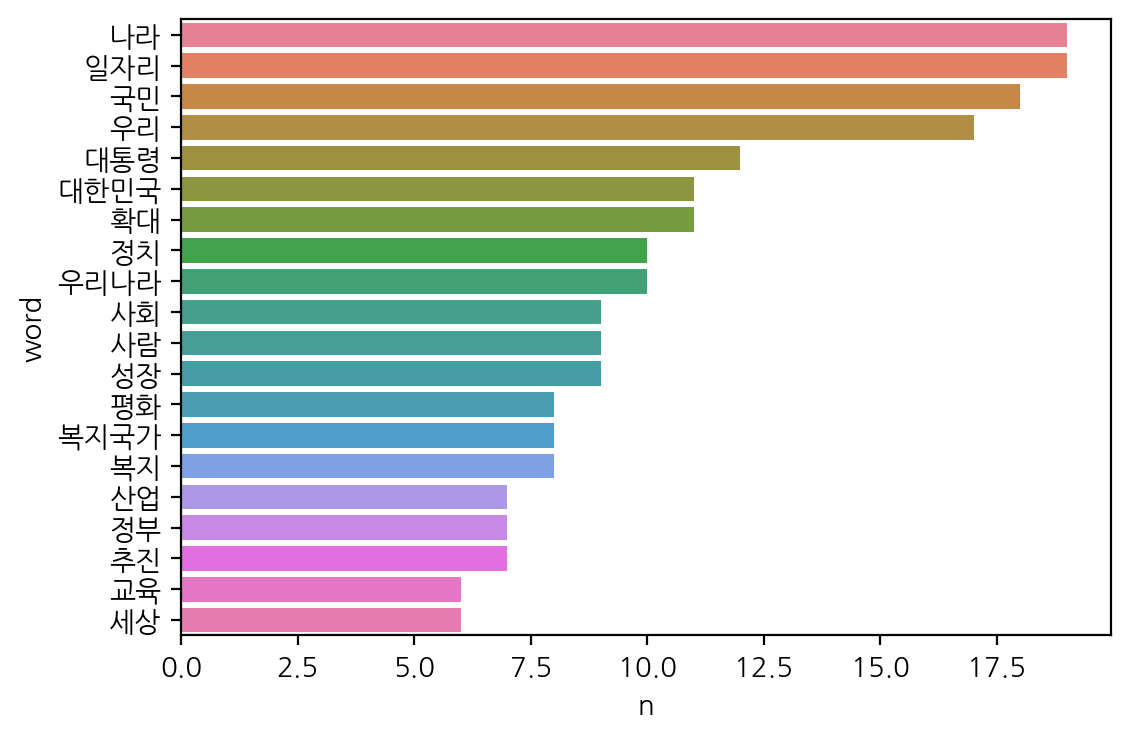

In [53]:
import seaborn as sns
# 막대 그래프 만들기
# plt.figure(figsize=[7, 5]) # 지역 설정
sns.barplot(data = top20, y = 'word', x = 'n', hue='word');

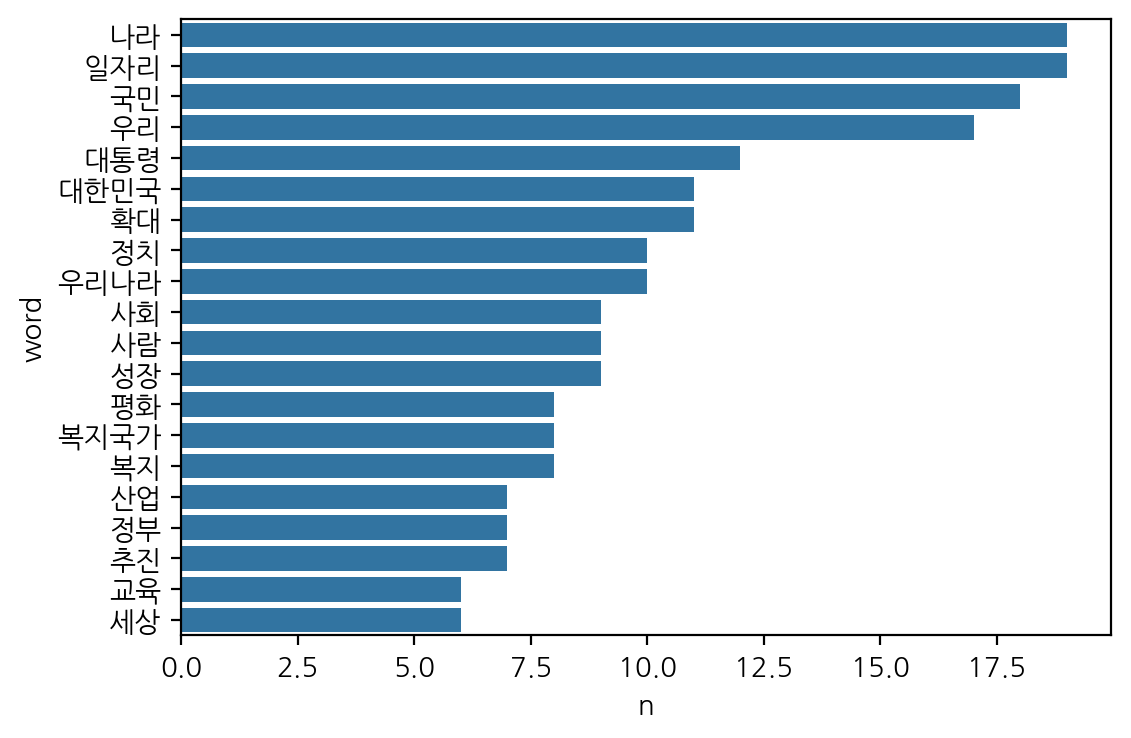

In [54]:
sns.barplot(data = top20, y = 'word', x = 'n');

### 워드 클라우드 만들기

#### 1. `wordcloud` 패키지 설치하기

#### 2. 한글 폰트 설정하기

In [ ]:
# PC에서 실행 시
# font = 'DoHyeon-Regular.ttf'

#### 3. 단어와 빈도를 담은 딕셔너리 만들기

In [55]:
df_word.head()

,word,n
153,나라,19
462,일자리,19
116,국민,18
422,우리,17
198,대통령,12


In [56]:
df_word.set_index('word') # 열 'word'를 인덱스로 지정, 기말고사

,n
word,
나라,19
일자리,19
국민,18
우리,17
대통령,12
...,...
북핵문제,1
분단,1
분야,1


In [69]:
df_word

,word,n
153,나라,19
462,일자리,19
116,국민,18
422,우리,17
198,대통령,12
...,...,...
278,북핵문제,1
279,분단,1
281,분야,1
283,분쟁,1


In [60]:
# pandas.pydata.com 문서, 기말시험
mydf = pd.DataFrame({'col1': [1, 2],'col2': [0.5, 0.75]}, index=['row1', 'row2'])
mydf

,col1,col2
row1,1,0.50
row2,2,0.75


In [61]:
# pandas.pydata.com 문서, 기말시험
mydf.to_dict()

{'col1': {'row1': 1, 'row2': 2}, 'col2': {'row1': 0.5, 'row2': 0.75}}

In [70]:
df_word.set_index('word').to_dict()

{'n': {'나라': 19,
  '일자리': 19,
  '국민': 18,
  '우리': 17,
  '대통령': 12,
  '대한민국': 11,
  '확대': 11,
  '정치': 10,
  '우리나라': 10,
  '사회': 9,
  '사람': 9,
  '성장': 9,
  '평화': 8,
  '복지국가': 8,
  '복지': 8,
  '산업': 7,
  '정부': 7,
  '추진': 7,
  '교육': 6,
  '세상': 6,
  '경쟁': 6,
  '보통사람들': 5,
  '공평': 5,
  '경제': 5,
  '대통령의': 5,
  '상생': 5,
  '정규직': 5,
  '정의': 4,
  '결과': 4,
  '사회적': 4,
  '투자': 4,
  '주인': 4,
  '전환': 4,
  '때문': 4,
  '모델': 4,
  '요구': 4,
  '희망': 4,
  '창출': 4,
  '역사': 4,
  '기회': 4,
  '여성': 4,
  '담쟁': 4,
  '강화': 4,
  '아래': 4,
  '고통': 4,
  '약자': 4,
  '아이들': 4,
  '중소기업': 4,
  '공정': 3,
  '문재인': 3,
  '특권': 3,
  '국가': 3,
  '사람들': 3,
  '노인': 3,
  '변화': 3,
  '비중': 3,
  '교육혁신': 3,
  '관계': 3,
  '질서': 3,
  '군대': 3,
  '지원': 3,
  '과도한': 3,
  '권력': 3,
  '부담': 3,
  '그것': 3,
  '지방': 3,
  '국민들': 3,
  '채택': 3,
  '소수': 3,
  '세계': 3,
  '신산업': 3,
  '시민': 3,
  '개선': 3,
  '혁신': 3,
  '혁명': 3,
  '양극화': 3,
  '원칙': 3,
  '활용': 3,
  '행복': 3,
  '원전': 3,
  '에너지': 3,
  '경제성장': 3,
  '세금': 3,
  '이명박': 3,
  '성장전략': 3,
  '가치': 3,
  '가지': 

In [71]:
# 데이터 프레임을 딕셔너리로 변환
dic_word = df_word.set_index('word').to_dict()['n']
dic_word

{'나라': 19,
 '일자리': 19,
 '국민': 18,
 '우리': 17,
 '대통령': 12,
 '대한민국': 11,
 '확대': 11,
 '정치': 10,
 '우리나라': 10,
 '사회': 9,
 '사람': 9,
 '성장': 9,
 '평화': 8,
 '복지국가': 8,
 '복지': 8,
 '산업': 7,
 '정부': 7,
 '추진': 7,
 '교육': 6,
 '세상': 6,
 '경쟁': 6,
 '보통사람들': 5,
 '공평': 5,
 '경제': 5,
 '대통령의': 5,
 '상생': 5,
 '정규직': 5,
 '정의': 4,
 '결과': 4,
 '사회적': 4,
 '투자': 4,
 '주인': 4,
 '전환': 4,
 '때문': 4,
 '모델': 4,
 '요구': 4,
 '희망': 4,
 '창출': 4,
 '역사': 4,
 '기회': 4,
 '여성': 4,
 '담쟁': 4,
 '강화': 4,
 '아래': 4,
 '고통': 4,
 '약자': 4,
 '아이들': 4,
 '중소기업': 4,
 '공정': 3,
 '문재인': 3,
 '특권': 3,
 '국가': 3,
 '사람들': 3,
 '노인': 3,
 '변화': 3,
 '비중': 3,
 '교육혁신': 3,
 '관계': 3,
 '질서': 3,
 '군대': 3,
 '지원': 3,
 '과도한': 3,
 '권력': 3,
 '부담': 3,
 '그것': 3,
 '지방': 3,
 '국민들': 3,
 '채택': 3,
 '소수': 3,
 '세계': 3,
 '신산업': 3,
 '시민': 3,
 '개선': 3,
 '혁신': 3,
 '혁명': 3,
 '양극화': 3,
 '원칙': 3,
 '활용': 3,
 '행복': 3,
 '원전': 3,
 '에너지': 3,
 '경제성장': 3,
 '세금': 3,
 '이명박': 3,
 '성장전략': 3,
 '가치': 3,
 '가지': 3,
 '여러분': 3,
 '강자': 3,
 '진정한': 2,
 '노동자들': 2,
 '마음속': 2,
 '노력': 2,
 '만큼': 2,
 '육성': 2,
 '모두

#### 4. 워드 클라우드 만들기

In [62]:
# 폰트 확인
!ls /usr/share/fonts/truetype/nanum/NanumGothic.ttf

/usr/share/fonts/truetype/nanum/NanumGothic.ttf


In [72]:
#  폰트 파일 이름 저장
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

In [64]:
!ls /usr/share/fonts/truetype/nanum

NanumBarunGothicBold.ttf	NanumGothicEcoR.ttf	       NanumPen.ttf
NanumBarunGothicLight.ttf	NanumGothicEco.ttf	       NanumSquare_acB.ttf
NanumBarunGothic.ttf		NanumGothicExtraBold.ttf       NanumSquare_acEB.ttf
NanumBarunGothicUltraLight.ttf	NanumGothicLight.ttf	       NanumSquare_acL.ttf
NanumBarunGothic-YetHangul.ttf	NanumGothic.ttf		       NanumSquare_acR.ttf
NanumBarunpenB.ttf		NanumMyeongjoBold.ttf	       NanumSquareB.ttf
NanumBarunpenR.ttf		NanumMyeongjoEcoBold.ttf       NanumSquareEB.ttf
NanumBrush.ttf			NanumMyeongjoEcoExtraBold.ttf  NanumSquareL.ttf
NanumGothicBold.ttf		NanumMyeongjoEcoR.ttf	       NanumSquareRoundB.ttf
NanumGothicCodingBold.ttf	NanumMyeongjoEco.ttf	       NanumSquareRoundEB.ttf
NanumGothicCoding.ttf		NanumMyeongjoExtraBold.ttf     NanumSquareRoundL.ttf
NanumGothicEcoBold.ttf		NanumMyeongjo.ttf	       NanumSquareRoundR.ttf
NanumGothicEcoExtraBold.ttf	NanumMyeongjo-YetHangul.ttf    NanumSquareR.ttf


In [73]:
#  폰트 파일 이름 저장
# FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf'
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'

In [76]:
# wc 만들기
from wordcloud import WordCloud
wc = WordCloud(random_state = 1234,         # 난수 고정
               font_path = FONT_PATH,       # 폰트 설정
               width = 400,                 # 가로 크기
               height = 400,                # 세로 크기
               # background_color = 'white')  # 배경색
               background_color = 'pink')  # 배경색

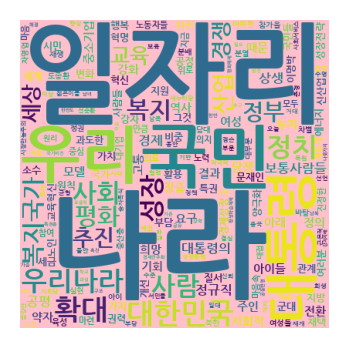

In [77]:
# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력하기
plt.figure(figsize = (7, 2))  # 가로, 세로 크기 설정
plt.axis('off')                 # 테두리 선 없애기
plt.imshow(img_wordcloud);     # 워드 클라우드 출력;

### 나만의 워드 클라우드 만들기

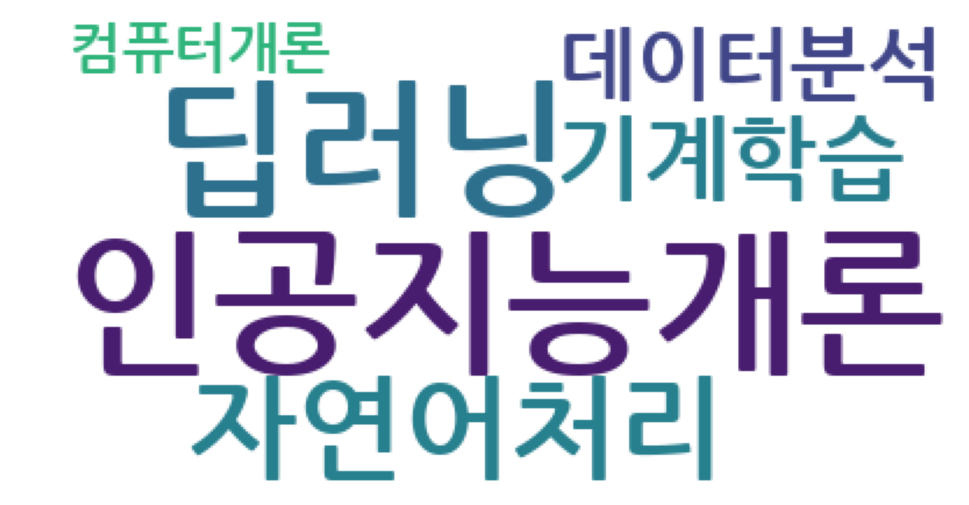

In [87]:
from wordcloud import WordCloud
wc = WordCloud(font_path = FONT_PATH, width = 400, height = 200, background_color = 'white')

import matplotlib.pyplot as plt
plt.axis('off')                 # 테두리 선 없애기
my_dicword = {'인공지능개론': 50, '기계학습': 25, '딥러닝': 45, '데이터분석': 25, '자연어처리': 40, '컴퓨터개론': 10 }
plt.imshow(wc.generate_from_frequencies(my_dicword));

### 워드 클라우드 모양 바꾸기

#### 1. mask 만들기


In [89]:
# [PIL: Python Imaging Library](https://pillow.readthedocs.io/en/stable)
import PIL
icon = PIL.Image.open('data/cloud.png')

In [90]:
icon.size

(825, 467)

In [91]:
import numpy as np
img = PIL.Image.new('RGB', icon.size, (255, 255, 255))
img.paste(icon, icon) # img에 icon을 복사 (이미지, 위치)가 필요
img = np.array(img)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
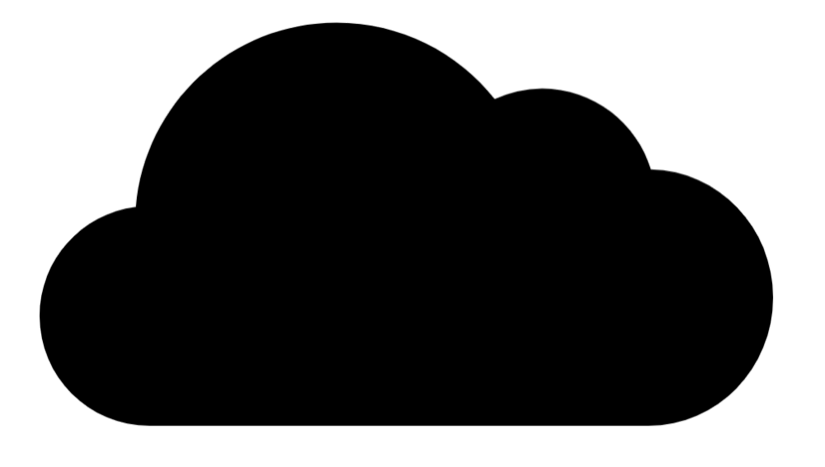

In [93]:
img

#### 2. 워드 클라우드 만들기

In [94]:
# wc 만들기
wc = WordCloud(random_state = 1234,         # 난수 고정
               font_path = FONT_PATH,       # 폰트 설정
               width = 400,                 # 가로 크기
               height = 400,                # 세로 크기
               background_color = 'white',  # 배경색
               mask = img)                  # mask 설정

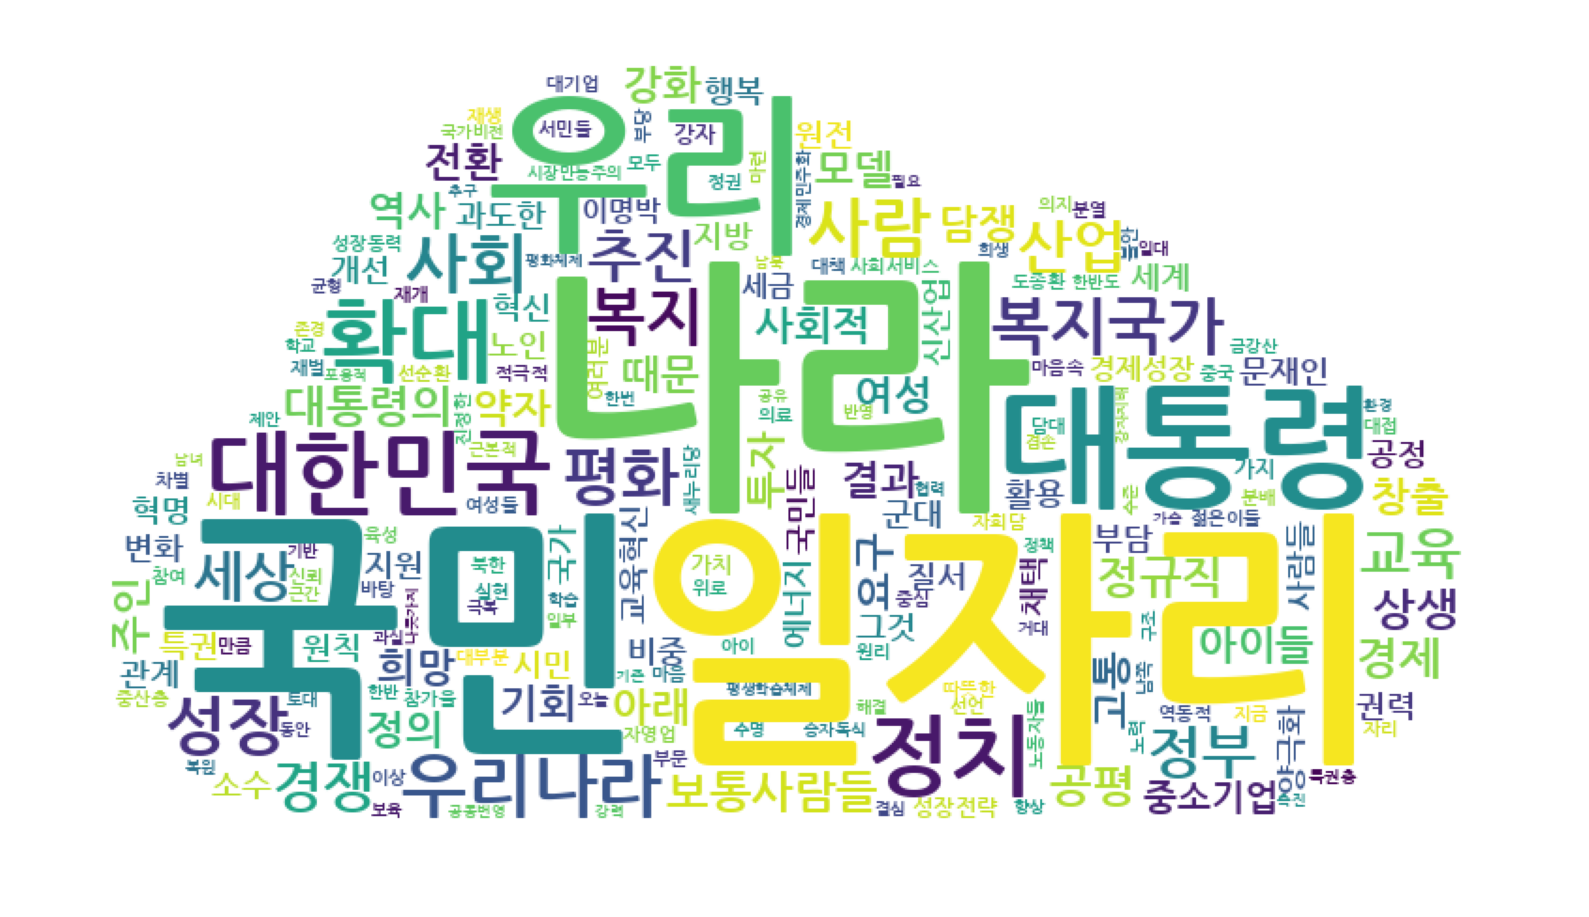

In [95]:
# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력하기
plt.figure(figsize = (10, 10))  # 가로, 세로 크기 설정
plt.axis('off')                 # 테두리 선 없애기
plt.imshow(img_wordcloud);       # 워드 클라우드 출력

### 워드 클라우드 색깔 바꾸기

In [96]:
# wc 만들기
wc = WordCloud(random_state = 1234,         # 난수 고정
               font_path = FONT_PATH,       # 폰트 설정
               width = 400,                 # 가로 크기
               height = 400,                # 세로 크기
               background_color = 'white',  # 배경색
               mask = img,                  # mask 설정
               colormap = 'plasma')
            #    colormap = 'inferno')        # 컬러맵 설정

### [Choosing Colormaps in Matplotlib](https://matplotlib.org/stable/users/explain/colors/colormaps.html)
- ['viridis', 'plasma', 'inferno', 'magma', 'cividis'])

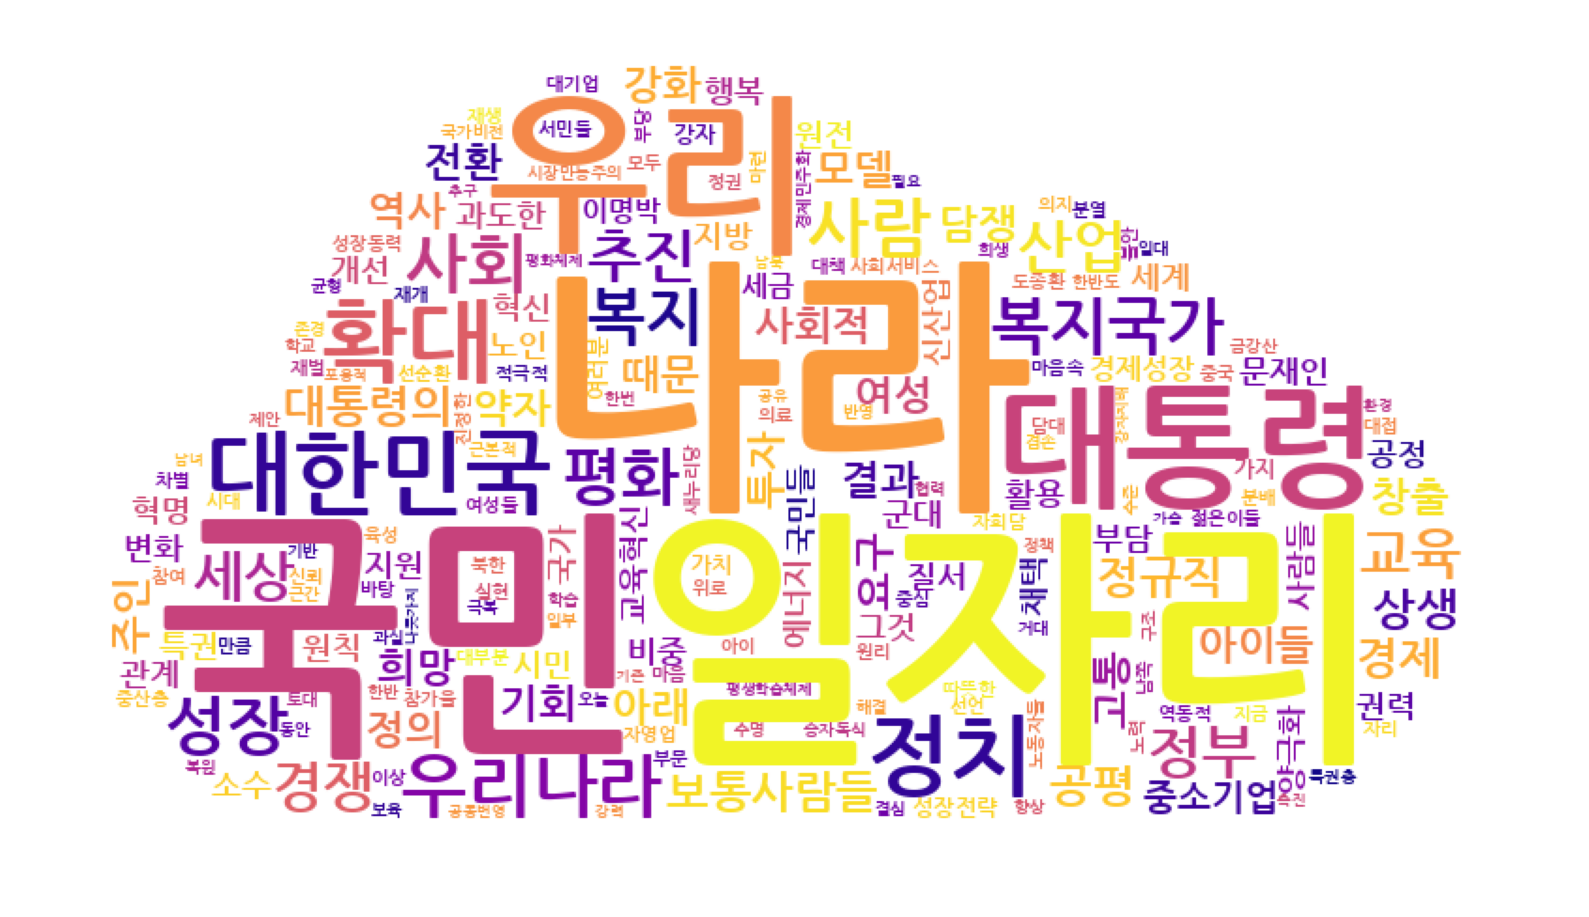

In [97]:
# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력하기
plt.figure(figsize = (10, 10))  # 가로, 세로 크기 설정
plt.axis('off')                 # 테두리 선 없애기
plt.imshow(img_wordcloud);      # 워드 클라우드 출력

## 10-2 기사 댓글 텍스트 마이닝

### 가장 많이 사용된 단어 알아보기

#### 1. 기사 댓글 불러오기

In [100]:
# 데이터 불러오기
df = pd.read_csv('data/news_comment_BTS.csv', encoding = 'UTF-8')

In [101]:
# 데이터 살펴보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reg_time  1200 non-null   object
 1   reply     1200 non-null   object
 2   press     1200 non-null   object
 3   title     1200 non-null   object
 4   url       1200 non-null   object
dtypes: object(5)
memory usage: 47.0+ KB


In [102]:
df.head()

,reg_time,reply,press,title,url
0,2020-09-01 22:58:09,국보소년단<U+0001F49C>,한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
1,2020-09-01 09:56:46,아줌마가 들어도 좋더라,한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
2,2020-09-01 09:08:06,팩트체크\n\n현재 빌보드 HOT 100\n\n1위 방탄소년단[BTS]\n2위 C...,한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
3,2020-09-01 08:52:32,방탄소년단이 한국사람이라 너무 자랑스러워요 ㅠㅠ 우리오래오래 함께하자!,한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
4,2020-09-01 08:36:33,"대단한 BTS, 월드 클래스는 다르네^^ 좋은 소식!! 응원해요",한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...


In [103]:
df['reply'][:10]

0                                    국보소년단<U+0001F49C>
1                                         아줌마가 들어도 좋더라
2    팩트체크\n\n현재 빌보드 HOT 100\n\n1위  방탄소년단[BTS]\n2위 C...
3              방탄소년단이 한국사람이라 너무 자랑스러워요 ㅠㅠ 우리오래오래 함께하자!
4                  대단한 BTS, 월드 클래스는 다르네^^ 좋은 소식!! 응원해요
5                        정국오빠 생일과 더불어 빌보드 1위기사라니ㅠㅠ축제구나
6    정말 축하하고 응원하지만\n집에서 여러 계정으로 스트리밍 돌리고 사재기하고 다른 팬...
7                         기자는 자고 일어났지만, 팬들은 못자고 발표 기다림
8                                자랑스럽다!!!!!! 축하합니다!!!!
9                                 SuperM 늘 응원하고 사랑합니다~
Name: reply, dtype: object

In [105]:
df[['reply']]

,reply
0,국보소년단<U+0001F49C>
1,아줌마가 들어도 좋더라
2,팩트체크\n\n현재 빌보드 HOT 100\n\n1위 방탄소년단[BTS]\n2위 C...
3,방탄소년단이 한국사람이라 너무 자랑스러워요 ㅠㅠ 우리오래오래 함께하자!
4,"대단한 BTS, 월드 클래스는 다르네^^ 좋은 소식!! 응원해요"
...,...
1195,역시!!!!!!!!!!!!
1196,우리 탄이들 너무 자랑스럽고\n사랑해<U+0001F49C><U+0001F49C><U...
1197,이런애들 꼭 군대를 보내 는게 맞을까요
1198,군면제급이다 이건


#### 2. 불필요한 문자 제거하기

In [109]:
# 불필요한 문자 제거하기
df['reply'] = df['reply'].str.replace('[^가-힣]', ' ', regex = True)
df['reply'].head()

0                                    국보소년단            
1                                         아줌마가 들어도 좋더라
2    팩트체크  현재 빌보드           위  방탄소년단       위       ...
3              방탄소년단이 한국사람이라 너무 자랑스러워요    우리오래오래 함께하자 
4                  대단한      월드 클래스는 다르네   좋은 소식   응원해요
Name: reply, dtype: object

#### 3. 명사 추출하기

In [ ]:
# kkma(꼬꼬마 형태소 분석기) 만들기
import konlpy
kkma = konlpy.tag.Kkma()

In [110]:
from konlpy.tag import Kkma
from konlpy.utils import pprint
kkma = Kkma()
pprint(kkma.sentences(u'네, 안녕하세요. 반갑습니다.'))
pprint(kkma.nouns(u'질문이나 건의사항은 깃헙 이슈 트래커에 남겨주세요.'))

['네, 안녕하세요.', '반갑습니다.']
['질문', '건의', '건의사항', '사항', '깃헙', '이슈', '트래커']


In [111]:
# 명사 추출 - apply() 활용 : 오랜 시간 걸림
nouns = df['reply'].apply(kkma.nouns)
nouns

0                                        [국보, 국보소년단, 소년단]
1                                                   [아줌마]
2                   [팩트, 팩트체크, 체크, 보드, 위, 방탄, 방탄소년단, 소년단]
3              [방탄, 방탄소년단, 소년단, 한국, 한국사람, 사람, 자랑, 우리, 하자]
4                                       [월드, 클래스, 소식, 응원]
                              ...                        
1195                                                   []
1196                                      [우리, 탄, 자랑, 사랑]
1197                                              [애, 군대]
1198                                     [군, 군면제급, 면제, 급]
1199    [자랑, 축하, 김, 김남, 남, 김석진, 민, 민윤기, 윤기, 정, 정호석, 호석...
Name: reply, Length: 1200, dtype: object

In [112]:
type(nouns)

pandas.core.series.Series

#### 4. 단어 빈도표 만들기

In [113]:
# 한 행에 한 단어가 들어가도록 구성
nouns = nouns.explode()
nouns

0          국보
0       국보소년단
0         소년단
1         아줌마
2          팩트
        ...  
1199      박지민
1199      김태형
1199        전
1199      전정국
1199       정국
Name: reply, Length: 9353, dtype: object

In [114]:
df = pd.DataFrame({'A': [[0, 1, 2], 'foo', [], [3, 4]],
                   'B': 1,
                   'C': [['a', 'b', 'c'], np.nan, [], ['d', 'e']]})
df

,A,B,C
0,"[0, 1, 2]",1,"[a, b, c]"
1,foo,1,NaN
2,[],1,[]
3,"[3, 4]",1,"[d, e]"


In [ ]:
df.explode('A') # 기말고사

,A,B,C
0,0,1,"[a, b, c]"
0,1,1,"[a, b, c]"
0,2,1,"[a, b, c]"
1,foo,1,NaN
2,NaN,1,[]
3,3,1,"[d, e]"
3,4,1,"[d, e]"


In [116]:
df['A']

0    [0, 1, 2]
1          foo
2           []
3       [3, 4]
Name: A, dtype: object

In [117]:
df['A'].explode()

0      0
0      1
0      2
1    foo
2    NaN
3      3
3      4
Name: A, dtype: object

In [118]:
# 데이터 프레임 만들기
df_word = pd.DataFrame({'word' : nouns})
df_word.head(10)

,word
0,국보
0,국보소년단
0,소년단
1,아줌마
2,팩트
2,팩트체크
2,체크
2,보드
2,위
2,방탄


In [119]:
# 글자 수 추가
df_word['count'] = df_word['word'].str.len()

# 두 글자 이상 단어만 남기기
df_word = df_word.query('count >= 2')
df_word

,word,count
0,국보,2.0
0,국보소년단,5.0
0,소년단,3.0
1,아줌마,3.0
2,팩트,2.0
...,...,...
1199,박지,2.0
1199,박지민,3.0
1199,김태형,3.0
1199,전정국,3.0


In [120]:
## 빈도표 만들기

# 단어별 분리
# 빈도 구하기
# 내림차순 정렬
df_word = df_word.groupby('word', as_index = False) \
                 .agg(n = ('word', 'count')) \
                 .sort_values('n', ascending = False)
df_word

,word,n
752,방탄,280
1878,축하,236
1556,자랑,205
1032,소년단,144
763,방탄소년단,136
...,...,...
1136,실력있음,1
406,다음주면,1
1134,신화,1
1133,신중,1


#### 5. 단어 빈도 막대 그래프 만들기

In [121]:
# 단어 빈도 상위 20개 추출
top20 = df_word.head(20)
top20

,word,n
752,방탄,280
1878,축하,236
1556,자랑,205
1032,소년단,144
763,방탄소년단,136
813,보드,131
618,면제,125
233,군면제,78
225,군대,77
1364,우리,68


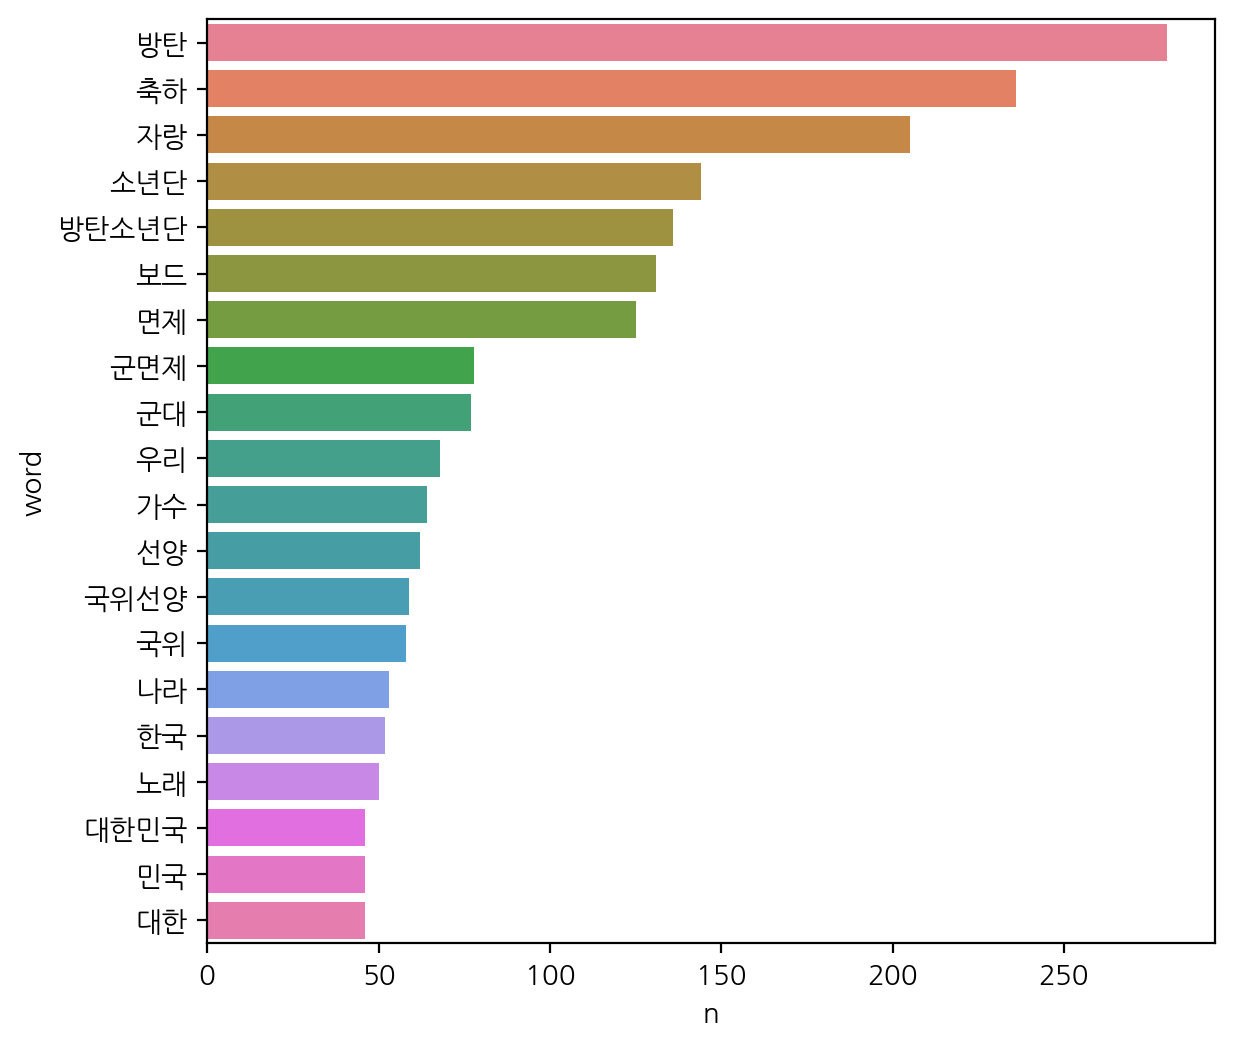

In [122]:
# 가로 세로 크기 설정
plt.rcParams.update({'figure.figsize': [6.5, 6]})

# 막대 그래프 만들기
sns.barplot(data = top20, y = 'word', x = 'n', hue = 'word');

### 워드 클라우드 만들기

In [123]:
# 데이터 프레임을 딕셔너리로 변환
dic_word = df_word.set_index('word').to_dict()['n']

In [124]:
# wc 만들기
wc = WordCloud(random_state = 1234,         # 난수 고정
               font_path = FONT_PATH,       # 폰트 설정
               width = 400,                 # 가로 크기
               height = 400,                # 세로 크기
               background_color = 'white',  # 배경색
               mask = img)                  # mask 설정

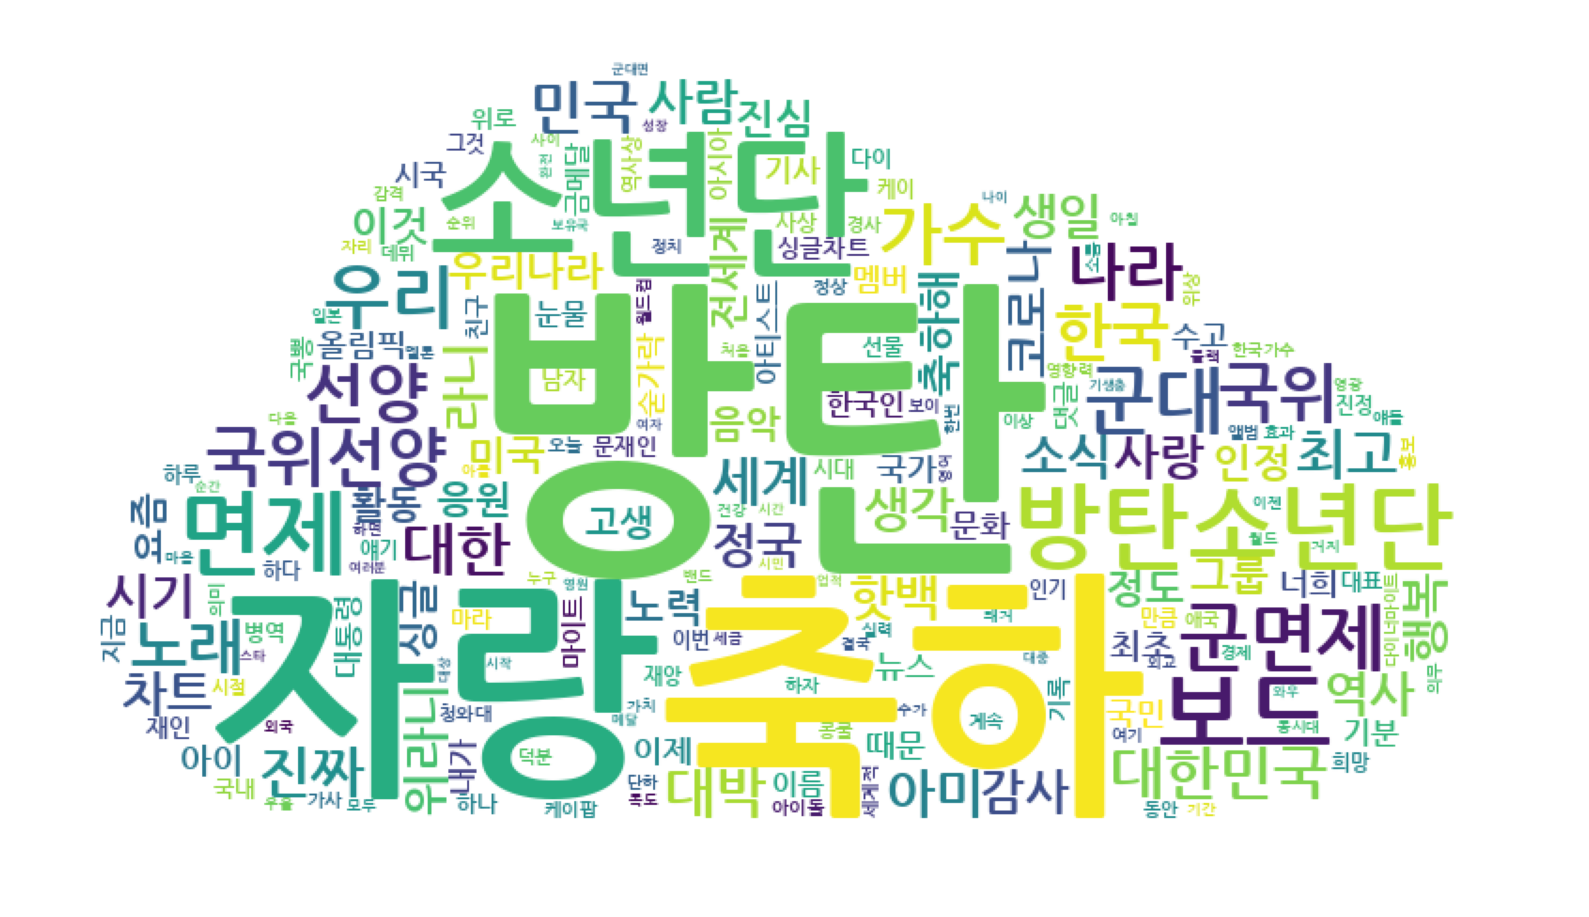

In [125]:
# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력하기
plt.figure(figsize = (10, 10))  # 가로, 세로 크기 설정
plt.axis('off')                 # 테두리 선 없애기
plt.imshow(img_wordcloud);       # 워드 클라우드 출력

## the end